## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [225]:
!pip install --upgrade pandas-datareader

  Obtaining dependency information for pandas-datareader from https://files.pythonhosted.org/packages/3f/16/56c9d648b503619ebe96f726b5f642b68e299b34162ed2d6faa9d7966b7d/pandas_datareader-0.10.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   ------- -------------------------------- 20.5/109.5 kB ? eta -:--:--
   -------------- ------------------------ 41.0/109.5 kB 653.6 kB/s eta 0:00:01
   -------------------------------- ------ 92.2/109.5 kB 751.6 kB/s eta 0:00:01
   -------------------------------------- 109.5/109.5 kB 636.0 kB/s eta 0:00:00


In [226]:
!pip install yfinance

In [229]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf

In [230]:
data = yf.download('AAPL', start ='2017-01-01', end='2018-12-31')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.989269,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.959057,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.096157,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.398230,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.649185,134247600
...,...,...,...,...,...,...
2018-12-21,39.215000,39.540001,37.407501,37.682499,36.121979,382978400
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.187359,148676800
2018-12-26,37.075001,39.307499,36.680000,39.292500,37.665306,234330000


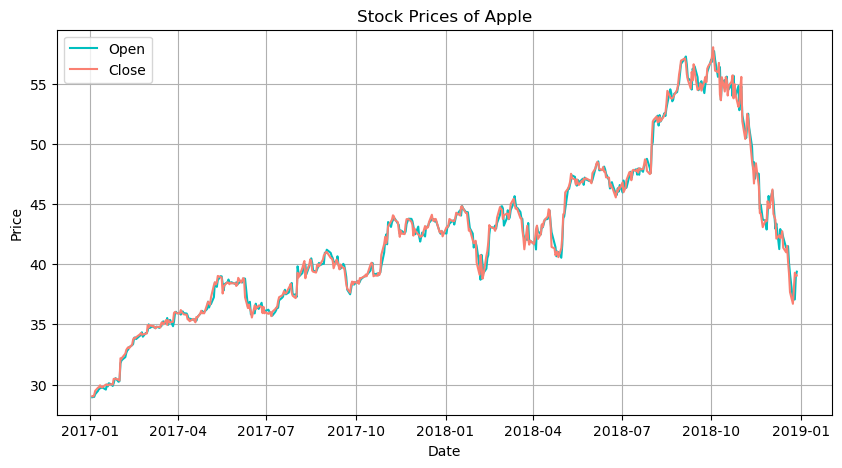

In [238]:
plt.figure(figsize=(10, 5))
plt.plot(data['Open'], label='Open', color='c')
plt.plot(data['Close'], label='Close', color='salmon')
plt.title('Stock Prices of Apple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [233]:
yf.pdr_override()
start = '2017-01-01'
end = '2018-12-31'
symbols = ['AAPL']

data = pdr.get_data_yahoo(symbols, start, end)

data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.989269,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.959057,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.096157,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.398230,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.649185,134247600


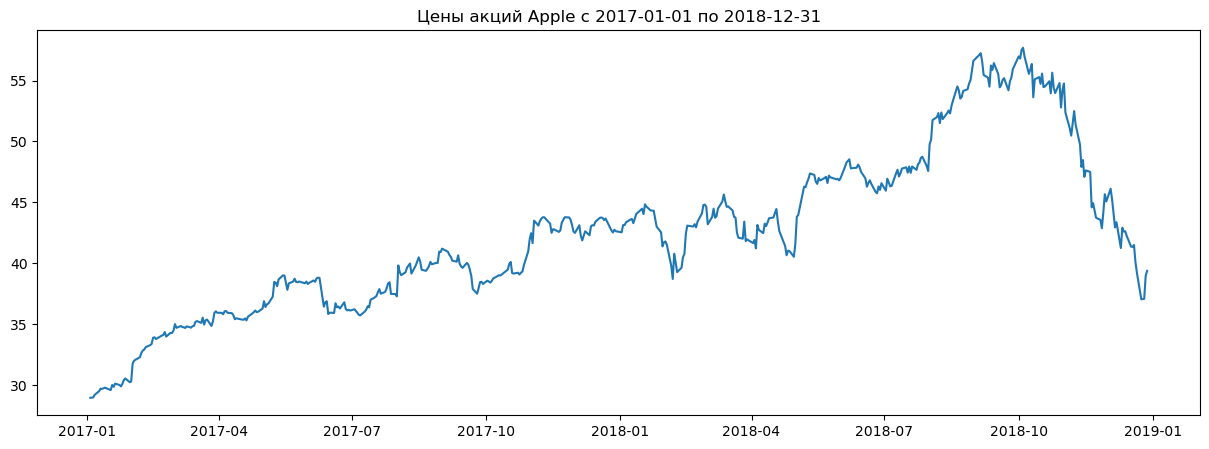

In [237]:
plt.figure(figsize = (15, 5))
plt.title(f'Цены акций Apple с {start} по {end}')
plt.plot(data['Open'])
plt.show()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

<Axes: >

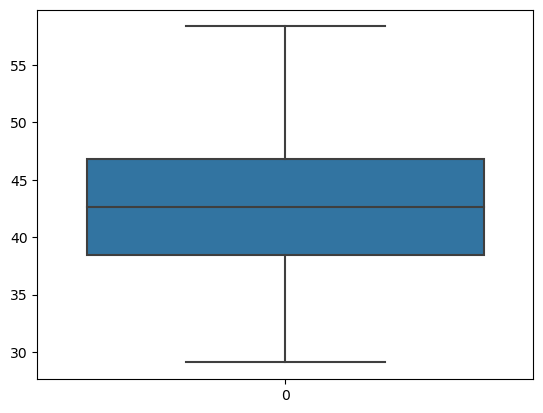

In [235]:
sns.boxplot(data=data['High'])

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов.

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день.

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [2]:
ar = np.load('average_ratings.npy')
ar.shape

(3, 1095)

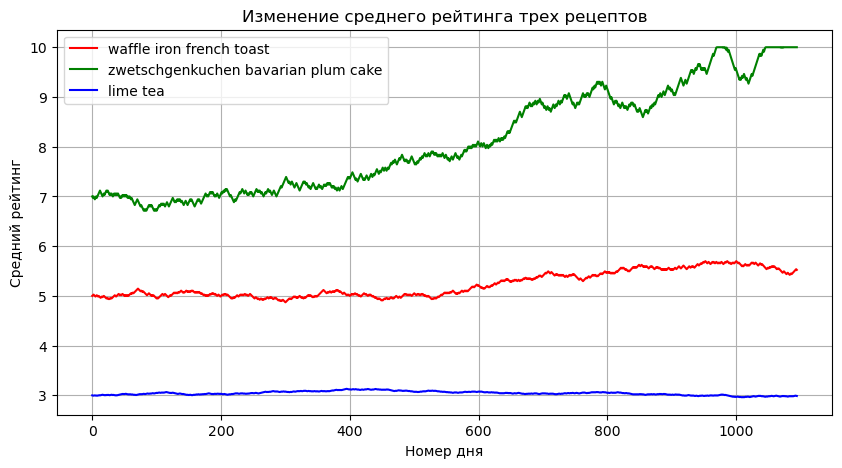

In [3]:
x = list(range(1095))
fig, ax = plt.subplots(figsize=(10, 5))

y1_line, = ax.plot(x, ar[0], 'r', label='waffle iron french toast')
y2_line, = ax.plot(x, ar[1], 'g', label='zwetschgenkuchen bavarian plum cake')
y3_line, = ax.plot(x, ar[2], 'b', label='lime tea')

ax.grid(True)
plt.title('Изменение среднего рейтинга трех рецептов')
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')

ax.legend(handles=[y1_line, y2_line, y3_line])
None

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


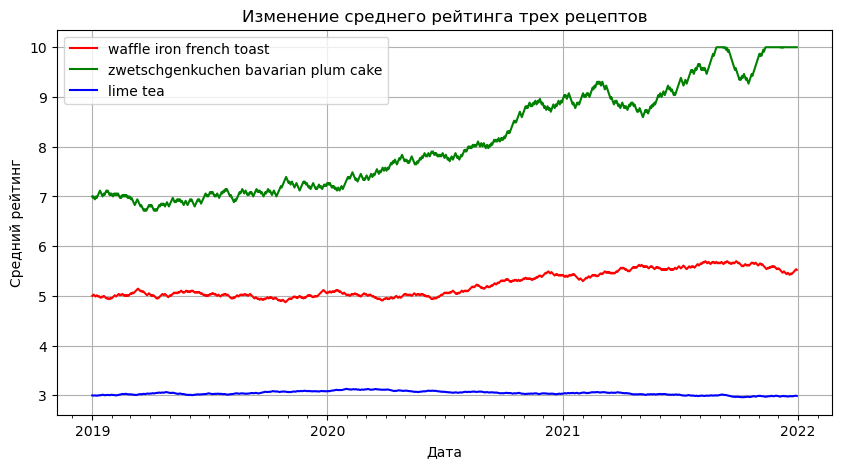

In [11]:
dates = pd.date_range(start="2019-01-01", end="2021-12-30")

fig, ax = plt.subplots(figsize=(10, 5))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

y1_line, = ax.plot(dates, ar[0], 'r', label='waffle iron french toast')
y2_line, = ax.plot(dates, ar[1], 'g', label='zwetschgenkuchen bavarian plum cake')
y3_line, = ax.plot(dates, ar[2], 'b', label='lime tea')

ax.grid(True)
plt.title('Изменение среднего рейтинга трех рецептов')
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')

ax.legend(handles=[y1_line, y2_line, y3_line])
None

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2.

Text(0, 0.5, 'Средний рейтинг')

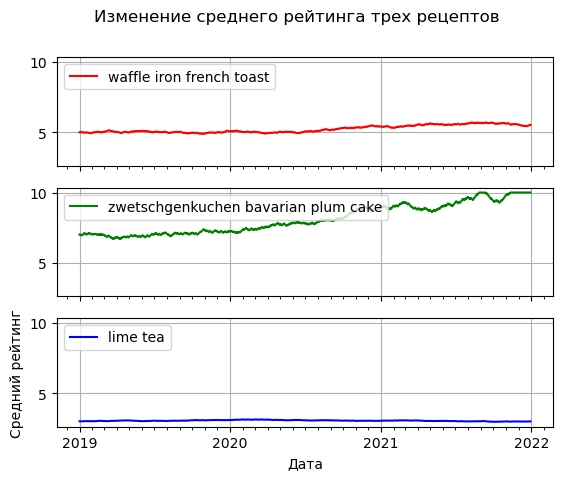

In [14]:
dates = pd.date_range(start="2019-01-01", end="2021-12-30")
labels = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)

for i in range(3):
    ax[i].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1)))
    ax[i].xaxis.set_minor_locator(mdates.MonthLocator())
    ax[i].plot(dates, ar[i], color=colors[i], label=labels[i])
    ax[i].legend(loc='upper left')
    ax[i].grid(True)

plt.suptitle('Изменение среднего рейтинга трех рецептов')
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтали. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [63]:
v = np.load('visitors.npy')

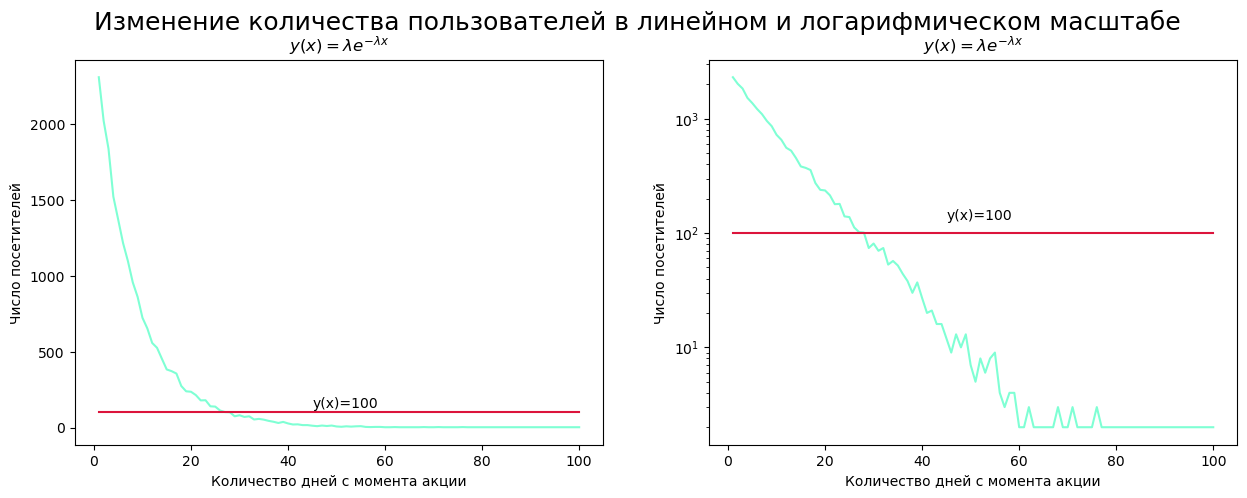

In [86]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

x = list(range(1, 101))
ax[1].set_yscale('log')

for i in range(2):
    ax[i].set_title('$y(x)=\lambda e^{-\lambda x}$')
    ax[i].plot(x, v, color='aquamarine')
    ax[i].plot(x, [100]*100, color='crimson')
    ax[i].text(45, 130, 'y(x)=100')
    ax[i].set_xlabel('Количество дней с момента акции')
    ax[i].set_ylabel('Число посетителей')

plt.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе', size=18)
None

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [17]:
reviews = pd.read_csv('reviews_sample.csv', index_col=0)
recipes = pd.read_csv('recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [18]:
length = []

for i in recipes['minutes']:
    if i < 5:
        length.append('short')
    elif 5 <= i < 50:
        length.append('medium')
    else:
        length.append('long')

In [19]:
recipes['len'] = length

In [20]:
steps = recipes.groupby('len')['n_steps'].mean()
steps

len
long      11.917290
medium     8.581922
short      4.990431
Name: n_steps, dtype: float64

In [21]:
size = recipes.groupby('len').size()
size

len
long      11718
medium    17607
short       675
dtype: int64

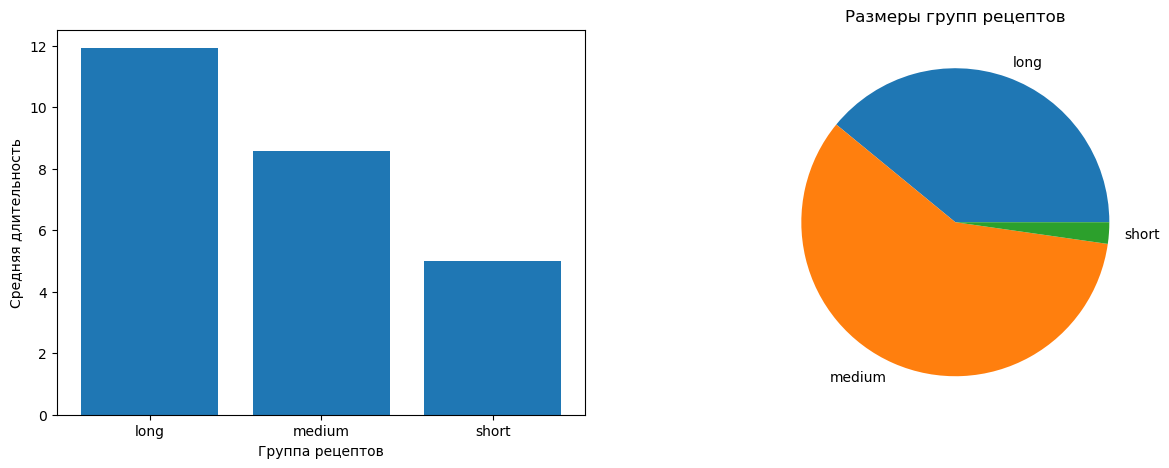

In [154]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

ax[0].bar(steps.index, steps)
ax[0].set_xlabel('Группа рецептов')
ax[0].set_ylabel('Средняя длительность')

ax[1].pie(size, labels=size.index)
ax[1].set_title('Размеры групп рецептов')
None

len
long      11.917290
medium     8.581922
short      4.990431
Name: n_steps, dtype: float64


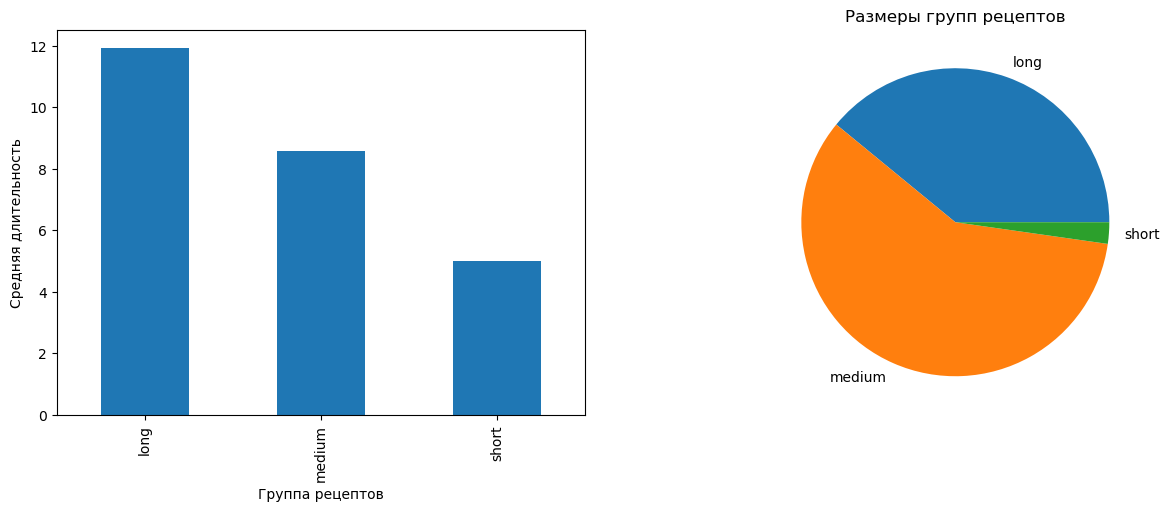

In [221]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

recipes.groupby('len')['n_steps'].mean().plot.bar(ax=ax[0])
recipes.groupby('len').size().plot.pie(ax=ax[1])

ax[0].set_xlabel('Группа рецептов')
ax[0].set_ylabel('Средняя длительность')
ax[1].set_title('Размеры групп рецептов')

None

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [182]:
twenty_o_eight = reviews[reviews['date'].apply(lambda x: x.year == 2008)]
twenty_o_nine = reviews[reviews['date'].apply(lambda x: x.year == 2009)]

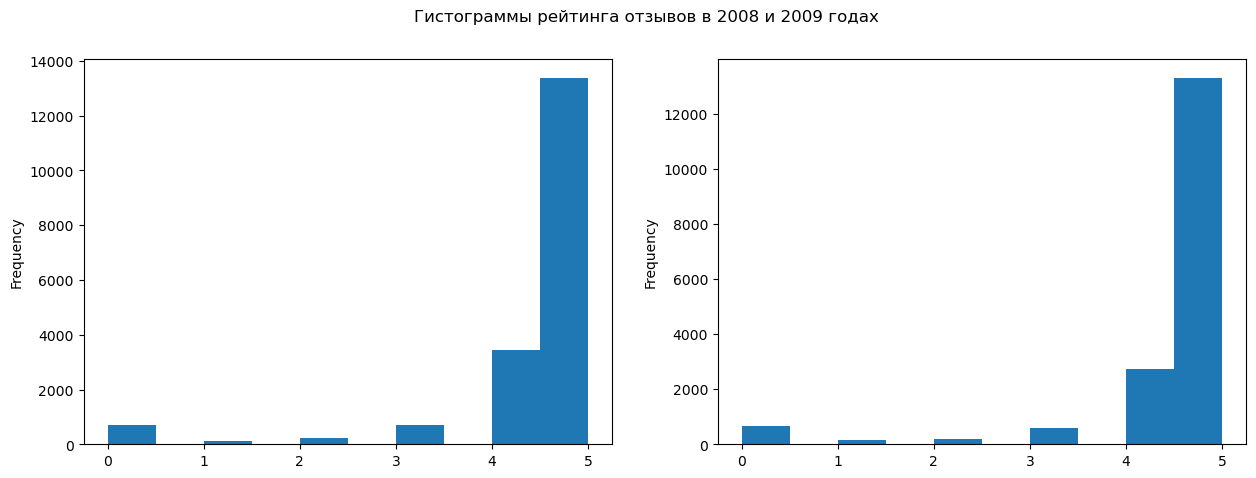

In [190]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

twenty_o_eight['rating'].plot.hist(ax=ax[0])
twenty_o_nine['rating'].plot.hist(ax=ax[1])

plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
None

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5).

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

In [15]:
import seaborn as sns

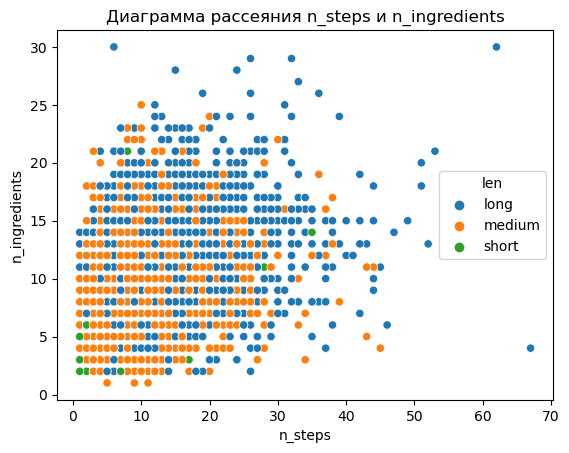

In [28]:
di = sns.scatterplot(recipes, x='n_steps', y='n_ingredients', hue='len')
di.set_title('Диаграмма рассеяния n_steps и n_ingredients')
None

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap).

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`.

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [30]:
merged = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id', how='inner')

In [31]:
to_matrix = merged[["minutes", "n_steps", "n_ingredients", "rating"]]
to_matrix

,minutes,n_steps,n_ingredients,rating
0,90,NaN,18.0,5
1,90,NaN,18.0,5
2,90,NaN,18.0,5
3,10,NaN,NaN,5
4,10,NaN,NaN,5
...,...,...,...,...
126691,60,NaN,NaN,5
126692,60,NaN,NaN,5
126693,60,NaN,NaN,5
126694,60,NaN,NaN,5


In [210]:
matrix = to_matrix.corr()
matrix

,minutes,n_steps,n_ingredients,rating
minutes,1.000000,0.030675,-0.006254,-0.025770
n_steps,0.030675,1.000000,0.293526,-0.019057
n_ingredients,-0.006254,0.293526,1.000000,0.003405
rating,-0.025770,-0.019057,0.003405,1.000000


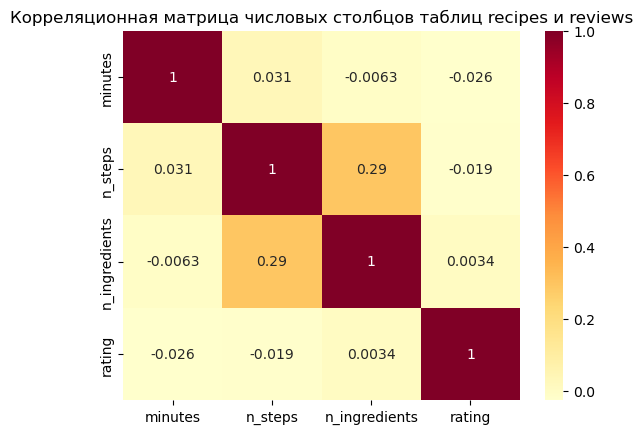

In [224]:
sns.heatmap(matrix, cmap='YlOrRd', annot=True).set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
None